In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
matchdf = pd.read_csv('ipl/matches.csv')
deliverydf = pd.read_csv('ipl/deliveries.csv')

In [114]:
matchdf.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [115]:
deliverydf.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

1. What makes this format so popular?

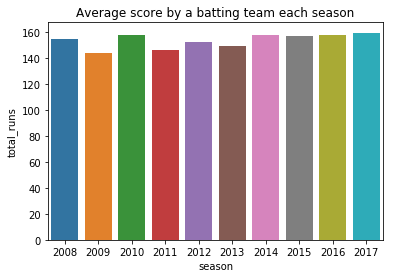

In [132]:
runs = matchdf[['id','season']].merge(deliverydf, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
innings_score = runs.groupby(['match_id', 'season', 'batting_team'])['total_runs'].sum().reset_index()
season_avg_score = innings_score.groupby(['season'])['total_runs'].mean().reset_index()
plot = sns.barplot(x='season',y='total_runs', data=season_avg_score)
plot.set_title('Average score by a batting team each season')
plt.show()

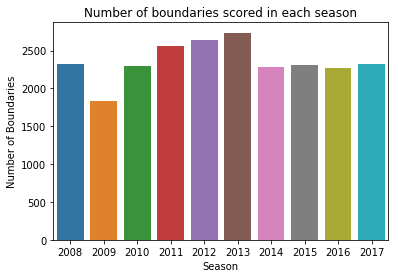

In [133]:
boundaries_per_season = runs[(runs['batsman_runs']==4) | (runs['batsman_runs']==6)].groupby(['season'])['batsman_runs'].count().reset_index()
plot = sns.barplot(x='season',y='batsman_runs', data=boundaries_per_season)

plot.set(xlabel='Season', ylabel='Number of Boundaries')
plot.set_title('Number of boundaries scored in each season')
plt.show()

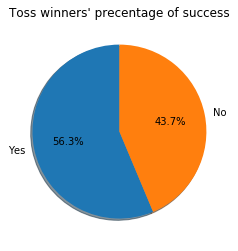

In [170]:
winner = matchdf[matchdf['toss_winner']==matchdf['winner']]
labels=['Yes','No']
plt.pie([len(winner),(577-len(winner))],labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plt.title("Toss winners' precentage of success")
plt.show()

2. Who are winning the high scoring matches?

In [127]:
matchdf.replace(['Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['DD','GL','KXIP','SRH','RPS','MI','KKR','RCB','DC','CSK','RR','KTK','PW','RPS'],inplace=True)

deliverydf.replace(['Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['DD','GL','KXIP','SRH','RPS','MI','KKR','RCB','DC','CSK','RR','KTK','PW','RPS'],inplace=True)

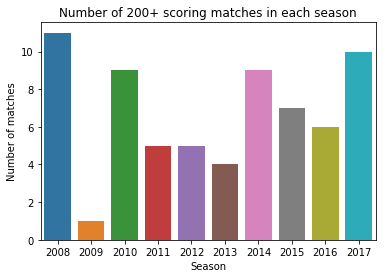

In [169]:
high_scores = runs.groupby(['match_id','season','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]

plot = sns.barplot(x='season',y='match_id', data=high_scores.groupby(['season'])['match_id'].count().reset_index())
plot.set(xlabel='Season', ylabel='Number of matches')
plot.set_title('Number of 200+ scoring matches in each season')
plt.show()

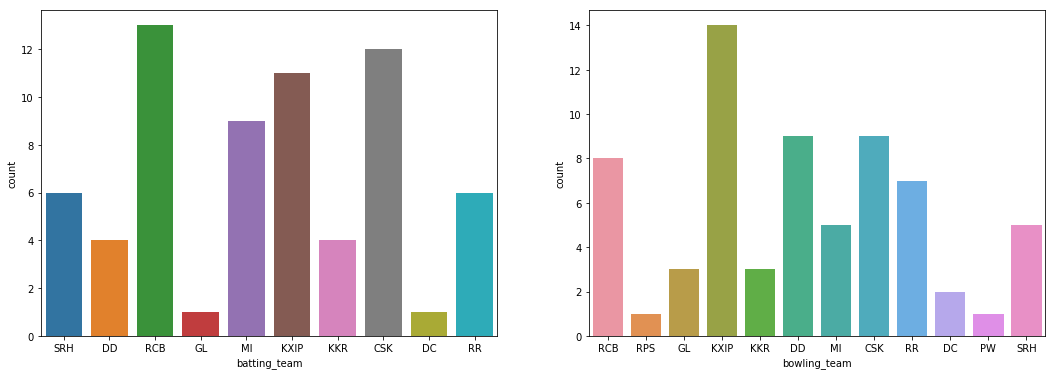

In [158]:
plot, ax =plt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
plot=plt.gcf()
plot.set_size_inches(18,6)
plt.show()

In [173]:
high_scores = deliverydf.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#high score in 1st innings
firstinning_scores = high_scores[high_scores['inning']==1]
secondinning_scores = high_scores[high_scores['inning']==2]
fullmatch_scores = firstinning_scores.merge(secondinning_scores[['match_id', 'inning', 'total_runs']], on='match_id')

In [176]:
fullmatch_scores.rename(columns={'inning_y':'inning_2','total_runs_x':'inning1_runs','inning_x':'inning_1','total_runs_y':'inning2_runs'},inplace=True)
fullmatch_scores = fullmatch_scores[fullmatch_scores['inning1_runs']>=200]
fullmatch_scores['chase_success'] = 1
fullmatch_scores['chase_success'] = np.where(fullmatch_scores['inning1_runs']<=fullmatch_scores['inning2_runs'], 'yes', 'no')

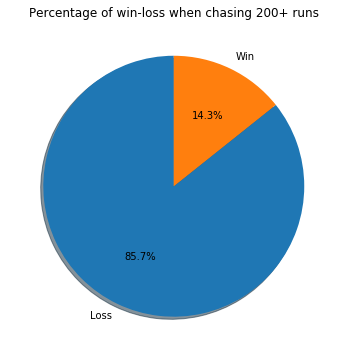

In [178]:
slices = fullmatch_scores['chase_success'].value_counts().reset_index().chase_success
list(slices)
labels = ['Loss','Win']
plt.pie(slices,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plot.set_size_inches(6,6)
plt.title("Percentage of win-loss when chasing 200+ runs")
plt.show()